<a href="https://www.kaggle.com/code/safaafathii/nlp-with-disaster-tweets-logistic-naive-bayes?scriptVersionId=113314405" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

# Context

#### In this competition, you’re challenged to build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t.

# Import Libraries

In [3]:
import nltk                               
import matplotlib.pyplot as plt           
import random  

import re                                
import string                            

from nltk.corpus import stopwords          
from nltk.stem import PorterStemmer       
from nltk.tokenize import TweetTokenizer


# Read Data

In [4]:
df_train = pd.read_csv("../input/nlp-getting-started/train.csv",index_col = "id")
df_train.head()

,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


# Explore Data

#### We'll use NLTK Package, an open-source Python library for natural language processing.

#### Total Number of Tweets

In [5]:
df_train.shape

(7613, 4)

#### Total Number of disaster Tweets

In [6]:
df_train[df_train["target"]==1].shape

(3271, 4)

#### Total Number of non-disaster Tweets

In [7]:
df_train[df_train["target"]==0].shape

(4342, 4)

#### Create a Pie Chart Between Number of Disaster and Non-Disaster Tweets

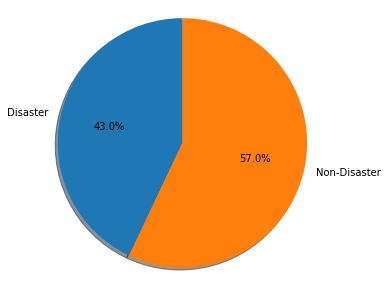

In [8]:
fig = plt.figure(figsize=(5, 5))
labels = 'Disaster', 'Non-Disaster'
sizes = [df_train[df_train["target"]==1].shape[0], df_train[df_train["target"]==0].shape[0]] 
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  
plt.show()

#### Split Training Data To All Disaster and All Non-Disaster Tweets

In [9]:
df_dis = df_train[df_train["target"]==1]
df_dis.shape

(3271, 4)

In [10]:
df_non_dis = df_train[df_train["target"]==0]
df_non_dis.shape

(4342, 4)

#### Show Random Disaster and Random Non-Disaster Tweets

In [11]:
# print Non-Disaster in greeen
print('\033[92m' + df_non_dis.iloc[random.randint(0,4342),2])

# print Disaster in red
print('\033[91m' + df_dis.iloc[random.randint(0,3271),2])

I think that none of us know the impact we have on the lives of those around us. Even the slightest stirring can create a violent storm.
Youth electrocuted in Khulna  | http://t.co/3EnyNdXpPm https://t.co/GQpi7jMKan via @sharethis


# Preprocessing

#### Steps:
#### 1. Tokenizing the Strings
#### 2. Lowercasing
#### 3. Removing Stopwords and Punctuations
#### 4. Stemming

#### Trying to clean a single random tweet first

In [12]:
tweet =  df_dis.iloc[random.randint(0,3271),2]
tweet

'HTML5 Beginners Crash Course http://t.co/Y32oWBroVF #course http://t.co/Vr2U4cErW8'

#### Remove old style retweet text "RT"

In [13]:
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

#### Remove Hyperlinks

In [14]:
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)

#### Remove Hashsign "#"

In [15]:
tweet2 = re.sub(r'#', '', tweet2)
print('\033[92m' + tweet)
print('\033[94m')

print(tweet2)

HTML5 Beginners Crash Course http://t.co/Y32oWBroVF #course http://t.co/Vr2U4cErW8

HTML5 Beginners Crash Course 


#### Tokenize the String

In [16]:
print('\033[92m' + tweet2)
print('\033[94m')

# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string:')
print(tweet_tokens)

HTML5 Beginners Crash Course 


Tokenized string:
['html', '5', 'beginners', 'crash', 'course']


#### Remove stop words and punctuations

In [17]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english') 

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [18]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)



['html', '5', 'beginners', 'crash', 'course']

removed stop words and punctuation:
['html', '5', 'beginners', 'crash', 'course']


#### Stemming

In [19]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

# Instantiate stemming class
stemmer = PorterStemmer() 

# Create an empty list to store the stems
tweets_stem = [] 

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(tweets_stem)



['html', '5', 'beginners', 'crash', 'course']

stemmed words:
['html', '5', 'beginn', 'crash', 'cours']


## Apply Preprocessing to the whole dataset

In [20]:
def preprocessing(df):
    try:
        # Remove old style retweet text "RT"
        
        df["text"] = df.loc[:,"text"].apply(lambda x : re.sub(r'^RT[\s]+', '', x))
    
        # Remove Hyperlinks
        
        df["text"] = df.loc[:,"text"].apply(lambda x : re.sub(r'https?:\/\/.*[\r\n]*', '', x))
    
        # Remove Hashsign "#"
        
        df["text"] = df.loc[:,"text"].apply(lambda x : re.sub(r'#', '', x))

        # Tokenize the String
    
        tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
        df["text"] = df.loc[:,"text"].apply(lambda x : tokenizer.tokenize(x))
        
        # Remove stop words and punctuations
        
        stopwords_english = stopwords.words('english') 
        def remove_Stop_Punc(listt):
            clean = []
            for word in listt: # Go through every word in your tokens list
                if (word not in stopwords_english and  # remove stopwords
                    word not in string.punctuation):  # remove punctuation
                    clean.append(word)
            return clean
        
        df["text"] = df.loc[:,"text"].apply(lambda x : remove_Stop_Punc(x))
        
        # Stemming
        
        # Instantiate stemming class
        stemmer = PorterStemmer()
        def stemming_func(listt):
            stemmed = [] 

            for word in listt:
                stem_word = stemmer.stem(word)  # stemming word
                stemmed.append(stem_word)  # append to the list
            return stemmed
    
        df["text"] = df.loc[:,"text"].apply(lambda x : stemming_func(x))
        
        
    except:
        print("Already Preprocessed")
        


#### Applying Preprcessing on Training Dataset

In [21]:
preprocessing(df_train)
print("------------------------------------------------------------")

------------------------------------------------------------


In [22]:
df_train.head()

,keyword,location,text,target
id,,,,
1,NaN,NaN,"[deed, reason, earthquak, may, allah, forgiv, us]",1
4,NaN,NaN,"[forest, fire, near, la, rong, sask, canada]",1
5,NaN,NaN,"[resid, ask, shelter, place, notifi, offic, ev...",1
6,NaN,NaN,"[13,000, peopl, receiv, wildfir, evacu, order,...",1
7,NaN,NaN,"[got, sent, photo, rubi, alaska, smoke, wildfi...",1


# Building and Visualizing word frequencies

#### Representation using Frequency Dictionary

In [23]:
wordFreq = {}
for index,row in df_train.iterrows():
    for word in row["text"]:
        pair = (word , row["target"])
        if pair in wordFreq:
            wordFreq[pair]+=1
        else:
            wordFreq[pair]=1
wordFreq

{('deed', 1): 1,
 ('reason', 1): 8,
 ('earthquak', 1): 39,
 ('may', 1): 50,
 ('allah', 1): 6,
 ('forgiv', 1): 1,
 ('us', 1): 44,
 ('forest', 1): 48,
 ('fire', 1): 268,
 ('near', 1): 49,
 ('la', 1): 21,
 ('rong', 1): 1,
 ('sask', 1): 1,
 ('canada', 1): 5,
 ('resid', 1): 9,
 ('ask', 1): 5,
 ('shelter', 1): 7,
 ('place', 1): 15,
 ('notifi', 1): 1,
 ('offic', 1): 41,
 ('evacu', 1): 101,
 ('order', 1): 25,
 ('expect', 1): 22,
 ('13,000', 1): 1,
 ('peopl', 1): 106,
 ('receiv', 1): 4,
 ('wildfir', 1): 78,
 ('california', 1): 110,
 ('got', 1): 29,
 ('sent', 1): 3,
 ('photo', 1): 28,
 ('rubi', 1): 1,
 ('alaska', 1): 5,
 ('smoke', 1): 14,
 ('pour', 1): 2,
 ('school', 1): 32,
 ('rockyfir', 1): 4,
 ('updat', 1): 36,
 ('hwi', 1): 11,
 ('20', 1): 13,
 ('close', 1): 30,
 ('direct', 1): 6,
 ('due', 1): 24,
 ('lake', 1): 9,
 ('counti', 1): 31,
 ('cafir', 1): 1,
 ('flood', 1): 118,
 ('disast', 1): 119,
 ('heavi', 1): 18,
 ('rain', 1): 39,
 ('caus', 1): 62,
 ('flash', 1): 17,
 ('street', 1): 24,
 ('manit

# Feature Extraction

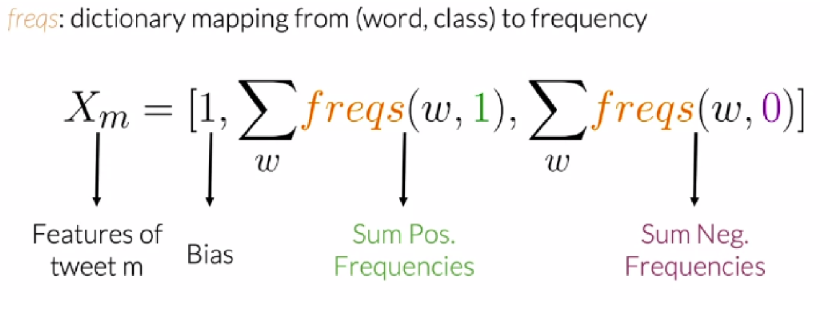

In [24]:
Xm = []
for index , row in df_train.iterrows():
    tweetFeatureList = []
    posFreq = 0
    negFreq = 0
    for word in row["text"]:
        if (word,1) in wordFreq:
            posFreq += wordFreq[(word,1)]
        if (word,0) in wordFreq:
            negFreq += wordFreq[(word,0)]
    tweetFeatureList.append(1)
    tweetFeatureList.append(posFreq)
    tweetFeatureList.append(negFreq)
    Xm.append(tweetFeatureList)

In [25]:
len(Xm)

7613

In [26]:
Xm

[[1, 149, 141],
 [1, 393, 117],
 [1, 248, 123],
 [1, 425, 143],
 [1, 192, 211],
 [1, 621, 164],
 [1, 582, 221],
 [1, 996, 840],
 [1, 356, 227],
 [1, 778, 716],
 [1, 266, 192],
 [1, 502, 492],
 [1, 240, 216],
 [1, 149, 54],
 [1, 319, 196],
 [1, 53, 82],
 [1, 17, 121],
 [1, 30, 142],
 [1, 79, 54],
 [1, 0, 1],
 [1, 627, 412],
 [1, 17, 39],
 [1, 16, 116],
 [1, 49, 118],
 [1, 0, 2],
 [1, 690, 585],
 [1, 46, 93],
 [1, 15, 121],
 [1, 3, 17],
 [1, 99, 309],
 [1, 21, 37],
 [1, 27, 48],
 [1, 78, 151],
 [1, 223, 131],
 [1, 48, 63],
 [1, 122, 239],
 [1, 141, 309],
 [1, 91, 55],
 [1, 1703, 1390],
 [1, 16, 38],
 [1, 8, 42],
 [1, 106, 82],
 [1, 288, 411],
 [1, 17, 20],
 [1, 699, 558],
 [1, 142, 298],
 [1, 324, 143],
 [1, 179, 167],
 [1, 8, 42],
 [1, 346, 621],
 [1, 235, 156],
 [1, 272, 405],
 [1, 1149, 913],
 [1, 197, 130],
 [1, 147, 154],
 [1, 140, 88],
 [1, 75, 57],
 [1, 725, 1030],
 [1, 177, 395],
 [1, 324, 143],
 [1, 102, 148],
 [1, 743, 595],
 [1, 50, 76],
 [1, 445, 181],
 [1, 16, 39],
 [1, 307,

## Now we've a Matrix with shape m x 3 ready to be fed to Logistic Regression Model

# Logistic Regression Model

#### Convert Xm Matrix into Pandas dataframe

In [27]:
data = pd.DataFrame(Xm,columns = ["Bias","PosFreq","NegFreq"])
data.head()

,Bias,PosFreq,NegFreq
0,1,149,141
1,1,393,117
2,1,248,123
3,1,425,143
4,1,192,211


In [28]:
df_train.reset_index(drop=True,inplace=True)

In [29]:
data["Sentiment"] = df_train["target"]

In [30]:
data.head()

,Bias,PosFreq,NegFreq,Sentiment
0,1,149,141,1
1,1,393,117,1
2,1,248,123,1
3,1,425,143,1
4,1,192,211,1


#### Split Data into Features and Label

In [31]:
X = data.drop("Sentiment",axis = 1)
y = data["Sentiment"]

#### Split data into Train and Validations

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.2, random_state=42)

## Logistic Regression Implementation

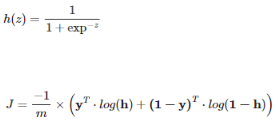

In [33]:
y_train = y_train.to_numpy(dtype='float64')
y_train = np.reshape(y_train,(y_train.shape[0],1))

In [34]:
m = X_train.shape[0]
alpha = 1e-8
theta = np.zeros((3, 1))
for i in range(0, 1500):
    z = np.dot(X_train,theta)
    Ypred = 1/(1 + np.exp(-z))
    cost = -1/m * (np.dot(y_train.T, np.log(Ypred)) + np.dot((1-y_train).T,np.log(1-Ypred)))
    theta = theta - (alpha/m) * np.dot(X_train.T,(Ypred-y_train))
theta

array([[-1.06400696e-06],
       [ 3.83766839e-04],
       [-3.68391681e-04]])

In [35]:
y_test = y_test.to_numpy(dtype='float64')
y_test = np.reshape(y_test,(y_test.shape[0],1))

# Test Logistic Regression Model

In [36]:
ypredicted = []
ztest =np.dot(X_test,theta)
Ytest = 1/(1 + np.exp(-ztest))
for i in Ytest:
    if i > 0.5:
        ypredicted.append(1.0)
    else :
        ypredicted.append(0.0)
accuracy = (ypredicted==np.squeeze(y_test)).sum()/len(X_test)

In [37]:
accuracy

0.7688772160210111

### Logistic regression model's accuracy = 0.7688772

# Naive Bayes 
#### Naive bayes is an algorithm that could be used for sentiment analysis. It takes a short time to train and also has a short prediction time.

In [38]:
wordFreq

{('deed', 1): 1,
 ('reason', 1): 8,
 ('earthquak', 1): 39,
 ('may', 1): 50,
 ('allah', 1): 6,
 ('forgiv', 1): 1,
 ('us', 1): 44,
 ('forest', 1): 48,
 ('fire', 1): 268,
 ('near', 1): 49,
 ('la', 1): 21,
 ('rong', 1): 1,
 ('sask', 1): 1,
 ('canada', 1): 5,
 ('resid', 1): 9,
 ('ask', 1): 5,
 ('shelter', 1): 7,
 ('place', 1): 15,
 ('notifi', 1): 1,
 ('offic', 1): 41,
 ('evacu', 1): 101,
 ('order', 1): 25,
 ('expect', 1): 22,
 ('13,000', 1): 1,
 ('peopl', 1): 106,
 ('receiv', 1): 4,
 ('wildfir', 1): 78,
 ('california', 1): 110,
 ('got', 1): 29,
 ('sent', 1): 3,
 ('photo', 1): 28,
 ('rubi', 1): 1,
 ('alaska', 1): 5,
 ('smoke', 1): 14,
 ('pour', 1): 2,
 ('school', 1): 32,
 ('rockyfir', 1): 4,
 ('updat', 1): 36,
 ('hwi', 1): 11,
 ('20', 1): 13,
 ('close', 1): 30,
 ('direct', 1): 6,
 ('due', 1): 24,
 ('lake', 1): 9,
 ('counti', 1): 31,
 ('cafir', 1): 1,
 ('flood', 1): 118,
 ('disast', 1): 119,
 ('heavi', 1): 18,
 ('rain', 1): 39,
 ('caus', 1): 62,
 ('flash', 1): 17,
 ('street', 1): 24,
 ('manit

#### create a probability for each class.
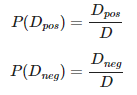

In [39]:
X = df_train.drop("target",axis = 1)
y = df_train["target"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.2, random_state=42)

In [40]:
ProbPos = y_train[y_train==1].shape[0] / y_train.shape[0]
ProbPos


0.43054187192118226

In [41]:
ProbNeg =  y_train[y_train==0].shape[0] / y_train.shape[0]
ProbNeg

0.5694581280788177

#### Prior and Logprior
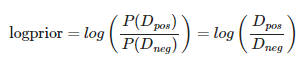

In [42]:
import math
logPrior = math.log(ProbPos/ProbNeg) 

In [43]:
logPrior

-0.2796406735767873

#### LogLikelihood
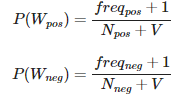
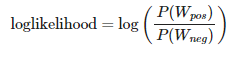

In [44]:
Xm = []
V = set([pair[0] for pair in wordFreq.keys()])
NPos = NNeg = 0
for index , row in X_train.iterrows():
     for word in row["text"]:
        if (word,1) in wordFreq:
            NPos += wordFreq[(word,1)]
        if (word,0) in wordFreq:
            NNeg += wordFreq[(word,0)]
          
            
len(V)

11981

In [45]:
likelihoodMatrix= {}
for index , row in X_train.iterrows():
    ProbWPos = 0
    ProbWNeg = 0
    for word in row["text"]:
        if (word,1) in wordFreq:
            ProbWPos = (wordFreq[(word,1)]+1)/(NPos + len(V))
        else:
            ProbWPos = (0+1)/(NPos + len(V))
        if (word,0) in wordFreq:
            ProbWNeg = (wordFreq[(word,0)]+1)/(NNeg + len(V))
            
        else:
            ProbWNeg = (0+1)/(NNeg + len(V))
        LogLikelihood = math.log(ProbWPos / ProbWNeg)
        likelihoodMatrix[word] = LogLikelihood
likelihoodMatrix

{'courag': -0.021690272808336502,
 'honest': -0.021690272808336502,
 'analysi': 1.587747639625764,
 'need': -0.9109523322945724,
 'use': -0.281973371072003,
 'atom': 2.940140449069973,
 'bomb': 1.2702934088403128,
 '1945': 1.9242198762469767,
 'hiroshima': 3.773798916363858,
 '70': 2.3532154817653352,
 'japanes': 0.8537784645455635,
 'militari': -0.5112384981270424,
 'refus': 1.2310726956870315,
 'surrend': 1.0769220158597732,
 'wld': -0.7148374533682819,
 'b': 0.5844455307619789,
 'shame': -0.427155380916501,
 'golf': -0.9379810046824916,
 'cart': -1.4079846339282271,
 'becam': 0.2659917996434443,
 'engulf': 0.13246040701892173,
 'flame': -0.12013034562158904,
 'boycottbear': -0.7148374533682819,
 'tell': -0.40468252506444247,
 'rescind': 0.6714569077516088,
 'medal': 1.0769220158597732,
 'honor': -0.7148374533682819,
 'given': -0.2448338241225463,
 'us': -0.491693902054072,
 'soldier': 1.2775927113219243,
 'massacr': 1.332855389996974,
 'wound': 0.20656837917264367,
 'knee': -0.42715

In [46]:
len(likelihoodMatrix)

10536

# Train Naive Bayes
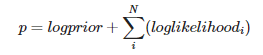

In [47]:
YTrainPred = []
for tweet in X_train["text"]:
    p = 0
    for word in tweet: 
        p += (logPrior + likelihoodMatrix[word])
    if p > 0:
        YTrainPred.append(1)
    else: 
        YTrainPred.append(0)

# Test Naive Bayes

In [48]:
error = np.mean(np.absolute(YTrainPred-y_train))
# Accuracy is 1 minus the error
accuracy = 1-error


In [49]:
accuracy


0.8307060755336617

## Accuracy of Naive Bayes Classifier =  0.8307060

In [50]:
# YTrainPred = []
# for tweet in X_test["text"]:
#     p = 0
#     for word in tweet: 
#         p += (logPrior + likelihoodMatrix[word])
#     if p > 0:
#         YTrainPred.append(1)
#     else: 
#         YTrainPred.append(0)